In [1]:
import finlab_crypto

ohlcv = finlab_crypto.crawler.get_all_binance('BTCUSDT', '1d')

All caught up..!


In [2]:
ohlcv = ohlcv.drop(['close_time','quote_av','trades','tb_base_av','tb_quote_av','ignore'], axis=1)
ohlcv

,open,high,low,close,volume
timestamp,,,,,
2017-08-17 00:00:00+00:00,4261.48,4485.39,4200.74,4285.08,795.150377
2017-08-18 00:00:00+00:00,4285.08,4371.52,3938.77,4108.37,1199.888264
2017-08-19 00:00:00+00:00,4108.37,4184.69,3850.00,4139.98,381.309763
2017-08-20 00:00:00+00:00,4120.98,4211.08,4032.62,4086.29,467.083022
2017-08-21 00:00:00+00:00,4069.13,4119.62,3911.79,4016.00,691.743060
...,...,...,...,...,...
2025-02-22 00:00:00+00:00,96181.99,96980.00,95770.49,96551.01,11268.177080
2025-02-23 00:00:00+00:00,96551.01,96650.00,95227.94,96258.00,10884.849130
2025-02-24 00:00:00+00:00,96258.00,96500.00,91349.26,91552.88,31550.102990


In [ ]:
df = ohlcv

In [ ]:
import tracemalloc
import talib
import pandas as pd
import psutil
import os
from talib import abstract

process = psutil.Process(os.getpid())
tracemalloc.start()

ta_list = talib.get_functions()

for x in ta_list:
    try:
        snapshot_before = tracemalloc.take_snapshot()
        mem_before = process.memory_info().rss / (1024**2)
        print(f"開始處理 {x}，前記憶體: {mem_before:.2f} MB")

        output = eval('abstract.' + x + '(df)')
        output.name = x.lower() if isinstance(output, pd.Series) else None

        df = pd.merge(df, pd.DataFrame(output), left_on=df.index, right_on=output.index)
        df = df.set_index('key_0')

        snapshot_after = tracemalloc.take_snapshot()
        mem_after = process.memory_info().rss / (1024**2)
        print(f"{x} 成功, merge 後記憶體: {mem_after:.2f} MB")

        # 可以比較 snapshot 之間的差異
        stats = snapshot_after.compare_to(snapshot_before, 'lineno')
        for stat in stats[:3]:
            print(stat)
    except MemoryError as me:
        current_mem = process.memory_info().rss / (1024**2)
        print(f"記憶體錯誤發生於: {x}，當前記憶體: {current_mem:.2f} MB")
        raise me
    except Exception as e:
        print(f"{x} 發生錯誤: {e}")

開始處理 HT_DCPERIOD，前記憶體: 391.72 MB
HT_DCPERIOD 成功, merge 後記憶體: 391.72 MB
/home/blake/anaconda3/envs/invest/lib/python3.12/site-packages/pandas/core/internals/managers.py:2301: size=129 KiB (+129 KiB), count=3 (+3), average=43.0 KiB
/home/blake/anaconda3/envs/invest/lib/python3.12/site-packages/pandas/core/arrays/datetimelike.py:2354: size=21.6 KiB (+21.6 KiB), count=3 (+3), average=7379 B
/home/blake/anaconda3/envs/invest/lib/python3.12/site-packages/talib/__init__.py:64: size=21.6 KiB (+21.6 KiB), count=2 (+2), average=10.8 KiB
開始處理 HT_DCPHASE，前記憶體: 391.72 MB
HT_DCPHASE 成功, merge 後記憶體: 393.03 MB
/home/blake/anaconda3/envs/invest/lib/python3.12/site-packages/pandas/core/internals/managers.py:2301: size=280 KiB (+151 KiB), count=6 (+3), average=46.6 KiB
/home/blake/anaconda3/envs/invest/lib/python3.12/site-packages/pandas/core/arrays/datetimelike.py:2354: size=43.2 KiB (+21.6 KiB), count=6 (+3), average=7379 B
/home/blake/anaconda3/envs/invest/lib/python3.12/site-packages/talib/__init__.p

In [8]:
df = df.drop(['acos','asin','cosh','exp','sinh'],axis = 1)
df

,open,high,low,close,volume,ht_dcperiod,ht_dcphase,inphase,quadrature,sine,...,linearreg_slope,stddev,tsf,var,atr,natr,trange,ad,adosc,obv
key_0,,,,,,,,,,,,,,,,,,,,,
2017-08-17 00:00:00+00:00,4261.48,4485.39,4200.74,4285.08,795.150377,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.239543e+02,NaN,795.150377
2017-08-18 00:00:00+00:00,4285.08,4371.52,3938.77,4108.37,1199.888264,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,432.75,-5.833409e+02,NaN,-404.737887
2017-08-19 00:00:00+00:00,4108.37,4184.69,3850.00,4139.98,381.309763,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,334.69,-3.039066e+02,NaN,-23.428124
2017-08-20 00:00:00+00:00,4120.98,4211.08,4032.62,4086.29,467.083022,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,178.46,-4.900489e+02,NaN,-490.511146
2017-08-21 00:00:00+00:00,4069.13,4119.62,3911.79,4016.00,691.743060,NaN,NaN,NaN,NaN,NaN,...,NaN,88.862865,NaN,7.896609e+03,NaN,NaN,207.83,-4.880851e+02,NaN,-1182.254206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-22 00:00:00+00:00,96181.99,96980.00,95770.49,96551.01,11268.177080,22.232985,64.321573,-1422.996465,-544.465484,0.901240,...,-21.369187,885.745302,96587.749670,7.845447e+05,3147.004263,3.259421,1209.51,1.238489e+07,5151.141977,-629527.093937
2025-02-23 00:00:00+00:00,96551.01,96650.00,95227.94,96258.00,10884.849130,22.082068,66.058680,-1175.499051,1261.680760,0.913962,...,-44.774176,777.977256,96397.587253,6.052486e+05,3023.793959,3.141343,1422.06,1.238978e+07,5896.158663,-640411.943067
2025-02-24 00:00:00+00:00,96258.00,96500.00,91349.26,91552.88,31550.102990,21.995413,54.683552,-477.313797,3102.777147,0.815972,...,-169.796769,2246.249050,95040.064945,5.045635e+06,3175.718676,3.468726,5150.74,1.236072e+07,-3580.044316,-671962.046057


In [9]:
import numpy as np

df['close'] = np.log(df['close']).diff(1)
df

,open,high,low,close,volume,ht_dcperiod,ht_dcphase,inphase,quadrature,sine,...,linearreg_slope,stddev,tsf,var,atr,natr,trange,ad,adosc,obv
key_0,,,,,,,,,,,,,,,,,,,,,
2017-08-17 00:00:00+00:00,4261.48,4485.39,4200.74,NaN,795.150377,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.239543e+02,NaN,795.150377
2017-08-18 00:00:00+00:00,4285.08,4371.52,3938.77,-0.042113,1199.888264,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,432.75,-5.833409e+02,NaN,-404.737887
2017-08-19 00:00:00+00:00,4108.37,4184.69,3850.00,0.007665,381.309763,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,334.69,-3.039066e+02,NaN,-23.428124
2017-08-20 00:00:00+00:00,4120.98,4211.08,4032.62,-0.013053,467.083022,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,178.46,-4.900489e+02,NaN,-490.511146
2017-08-21 00:00:00+00:00,4069.13,4119.62,3911.79,-0.017351,691.743060,NaN,NaN,NaN,NaN,NaN,...,NaN,88.862865,NaN,7.896609e+03,NaN,NaN,207.83,-4.880851e+02,NaN,-1182.254206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-22 00:00:00+00:00,96181.99,96980.00,95770.49,0.003829,11268.177080,22.232985,64.321573,-1422.996465,-544.465484,0.901240,...,-21.369187,885.745302,96587.749670,7.845447e+05,3147.004263,3.259421,1209.51,1.238489e+07,5151.141977,-629527.093937
2025-02-23 00:00:00+00:00,96551.01,96650.00,95227.94,-0.003039,10884.849130,22.082068,66.058680,-1175.499051,1261.680760,0.913962,...,-44.774176,777.977256,96397.587253,6.052486e+05,3023.793959,3.141343,1422.06,1.238978e+07,5896.158663,-640411.943067
2025-02-24 00:00:00+00:00,96258.00,96500.00,91349.26,-0.050115,31550.102990,21.995413,54.683552,-477.313797,3102.777147,0.815972,...,-169.796769,2246.249050,95040.064945,5.045635e+06,3175.718676,3.468726,5150.74,1.236072e+07,-3580.044316,-671962.046057


In [ ]:
df = df.replace([np.inf, -np.inf], np.nan)  # 將inf/-inf轉為NaN
df = df.fillna(method='ffill')
df = df.dropna()
df

,open,high,low,close,volume,ht_dcperiod,ht_dcphase,inphase,quadrature,sine,...,linearreg_slope,stddev,tsf,var,atr,natr,trange,ad,adosc,obv
key_0,,,,,,,,,,,,,,,,,,,,,
2017-11-13 00:00:00+00:00,5839.94,6697.47,5699.99,0.106798,2621.243039,20.172882,224.526635,-56.180823,-220.726208,-0.701241,...,-50.487868,411.510150,6442.076703,1.693406e+05,583.270912,9.020597,997.48,1.191550e+04,-1645.193244,3307.533062
2017-11-14 00:00:00+00:00,6465.99,6684.98,6311.07,0.016717,1254.292531,20.092535,238.824502,-114.352037,-723.425365,-0.855586,...,-69.302659,277.834195,6308.965055,7.719184e+04,568.316561,8.643611,373.91,1.243186e+04,-1167.669163,4561.825593
2017-11-15 00:00:00+00:00,6575.99,7298.00,6575.99,0.096356,1779.605845,19.962651,259.930606,-494.978748,-859.083893,-0.984597,...,-60.014967,466.656655,6413.342747,2.177684e+05,579.366092,8.002228,723.01,1.392585e+04,-390.807629,6341.431438
2017-11-16 00:00:00+00:00,7240.14,7940.00,7076.00,0.082729,2331.956750,19.925320,275.073338,-786.503536,-485.227155,-0.996082,...,-26.253516,702.380191,6726.876484,4.933379e+05,599.697086,7.625368,864.00,1.585025e+04,574.837732,8673.388188
2017-11-17 00:00:00+00:00,7876.98,7989.00,7451.00,-0.021244,3982.395925,20.047092,296.100178,-962.695020,502.921295,-0.898026,...,2.206462,568.672513,6982.051319,3.233884e+05,595.290151,7.731854,538.00,1.554217e+04,819.590875,4690.992263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-22 00:00:00+00:00,96181.99,96980.00,95770.49,0.003829,11268.177080,22.232985,64.321573,-1422.996465,-544.465484,0.901240,...,-21.369187,885.745302,96587.749670,7.845447e+05,3147.004263,3.259421,1209.51,1.238489e+07,5151.141977,-629527.093937
2025-02-23 00:00:00+00:00,96551.01,96650.00,95227.94,-0.003039,10884.849130,22.082068,66.058680,-1175.499051,1261.680760,0.913962,...,-44.774176,777.977256,96397.587253,6.052486e+05,3023.793959,3.141343,1422.06,1.238978e+07,5896.158663,-640411.943067
2025-02-24 00:00:00+00:00,96258.00,96500.00,91349.26,-0.050115,31550.102990,21.995413,54.683552,-477.313797,3102.777147,0.815972,...,-169.796769,2246.249050,95040.064945,5.045635e+06,3175.718676,3.468726,5150.74,1.236072e+07,-3580.044316,-671962.046057


In [11]:
df.to_csv('gan訓練資料.csv')

In [12]:
import torch
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import random
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from datetime import datetime
import pytz

In [13]:
# Define device
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')
print('Device:', device)

Device: cuda


In [14]:
# Configuration Parameters for Data Processing
CSV_FILE = 'gan訓練資料.csv'
SEQUENCE_LENGTH = 60
BATCH_SIZE = 64
TRAIN_PERCENT = 0.8
FUTURE_STEP = 30

In [15]:
# Data Processing Classes
class TimeSeriesDataset(Dataset):
    def __init__(self, data, sequence_length):
        """
        Initializes the TimeSeriesDataset.

        :Arg data: numpy.ndarray, shape [num_samples, num_features].
                    Time series data for training or validation.
        :Arg sequence_length: int, Length of input sequences.
        """
        self.data = data  # Time series data
        self.sequence_length = sequence_length

    def __len__(self):
        # Returns the total number of sequences that can be generated
        return len(self.data) - self.sequence_length + 1

    def __getitem__(self, idx):
        """
        Retrieves a sequence of data given an index.

        :Arg idx: int, Index to retrieve the sequence.
        :Return seq: torch.Tensor, shape [sequence_length, num_features].
                     The input sequence of length `sequence_length`.
        """
        seq = self.data[idx:idx + self.sequence_length]  # Extract sequence
        return seq

    def get_future_y(self, idx, future_steps):
        """
        Retrieves future values from the dataset.

        :Arg idx: int, Index to start retrieving future values.
        :Arg future_steps: int, Number of future steps to retrieve.
        :Return y_seq: numpy.ndarray or None, Future values of shape [future_steps].
                       Returns None if not enough future data is available.
        """
        if idx + self.sequence_length + future_steps <= len(self.data):
            return self.data[idx + self.sequence_length:idx + self.sequence_length + future_steps, 0]  
        else:
            return None  # Not enough future data

class DataProcessor:
    def __init__(self, csv_file, sequence_length, batch_size, shuffle=True, num_workers=4):
        """
        Initializes the DataProcessor.

        :Arg csv_file: str, Path to the CSV file containing the time series data.
        :Arg sequence_length: int, Length of input sequences.
        :Arg batch_size: int, Size of batches for DataLoader.
        :Arg shuffle: bool, Whether to shuffle the data.
        :Arg num_workers: int, Number of subprocesses to use for data loading.
        """
        self.csv_file = csv_file
        self.sequence_length = sequence_length
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.num_workers = num_workers

        # Load and preprocess data
        self.data = self.load_and_check_csv()
        self.scaled_data = self.preprocess_data()
        self.dataset = self.create_dataset()
        self.train_loader, self.val_loader = self.create_dataloaders()

    def load_and_check_csv(self):
        """
        Loads the CSV file and checks its validity.

        :Return data: pandas.DataFrame, Loaded and checked data.
        :Raise FileNotFoundError: If the CSV file does not exist.
        :Raise ValueError: If the 'DATE' column is missing.
        """
        # Check CSV file availability
        if not os.path.isfile(self.csv_file):
            raise FileNotFoundError(f"CSV file '{self.csv_file}' not found.")

        # Read CSV file and check column names
        data = pd.read_csv(self.csv_file)
        data = data.drop(columns=['key_0'])


        print("CSV file check passed.")
        return data

    def preprocess_data(self):
        """
        Preprocesses the data by standardizing it and converting it to PyTorch tensor format.

        :Return scaled_data: torch.Tensor, shape [num_samples, num_features].
                             Preprocessed and scaled data.
        """
        display(self.data.head(5))  # Display first 5 rows of data
        scaler = StandardScaler()
        nvdia_return = self.data['close']
        self.data = self.data.drop(columns=['close'])

        # Standardize the data
        scaled_data = scaler.fit_transform(self.data)
        new_data = pd.DataFrame()
        new_data['close'] = nvdia_return
        new_data = pd.concat([new_data, pd.DataFrame(scaled_data)], axis=1)
        self.data = new_data

        print("Data scaled!")
        display(self.data.head(5))  # Display first 5 rows of scaled data
        self.data = self.data.to_numpy()  # Convert to numpy
        return torch.tensor(new_data.to_numpy(), dtype=torch.float32)  # Convert to PyTorch tensor

    def create_dataset(self):
        """
        Creates a TimeSeriesDataset instance.

        :Return dataset: TimeSeriesDataset, Dataset containing the time series data.
        """
        return TimeSeriesDataset(self.data, self.sequence_length)

    def create_dataloaders(self):
        """
        Creates DataLoader instances for training and validation datasets.

        :Return train_loader: DataLoader, DataLoader for the training dataset.
        :Return val_loader: DataLoader, DataLoader for the validation dataset.
        """
        # Split the dataset into training and validation sets
        split_index = int(TRAIN_PERCENT * len(self.dataset))
        train_dataset = torch.utils.data.Subset(self.dataset, range(split_index))
        val_dataset = torch.utils.data.Subset(self.dataset, range(split_index, len(self.dataset)))

        # Create DataLoader instances
        train_loader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=self.shuffle, num_workers=self.num_workers)
        val_loader = DataLoader(val_dataset, batch_size=self.batch_size, shuffle=False, num_workers=self.num_workers)
        return train_loader, val_loader

    def get_y_for_batch(self, batch_indices, future_steps):
        """
        Retrieves future y values for a given batch of indices.

        :Arg batch_indices: list of int, Indices for which to retrieve y values.
        :Arg future_steps: int, Number of future steps to retrieve.
        :Return future_y: torch.Tensor, shape [num_valid_samples, future_steps].
                           Stacked tensor of future y values.
        """
        future_y_list = []
        for idx in batch_indices:
            y_seq = self.dataset.get_future_y(idx, future_steps=future_steps)
            if y_seq is not None:
                # Convert numpy array to torch tensor
                future_y_list.append(torch.tensor(y_seq, dtype=torch.float32))

        # Return stacked tensor of future y values
        return torch.stack(future_y_list)  # Return stacked tensor


In [17]:
# Initialize DataProcessor
data_processor = DataProcessor(csv_file=CSV_FILE, sequence_length=SEQUENCE_LENGTH, batch_size=BATCH_SIZE)
train_loader = data_processor.train_loader
val_loader = data_processor.val_loader

CSV file check passed.


,open,high,low,close,volume,ht_dcperiod,ht_dcphase,inphase,quadrature,sine,...,linearreg_slope,stddev,tsf,var,atr,natr,trange,ad,adosc,obv
0,5839.94,6697.47,5699.99,0.106798,2621.243039,20.172882,224.526635,-56.180823,-220.726208,-0.701241,...,-50.487868,411.510150,6442.076703,169340.603936,583.270912,9.020597,997.48,11915.498498,-1645.193244,3307.533062
1,6465.99,6684.98,6311.07,0.016717,1254.292531,20.092535,238.824502,-114.352037,-723.425365,-0.855586,...,-69.302659,277.834195,6308.965055,77191.839936,568.316561,8.643611,373.91,12431.861391,-1167.669163,4561.825593
2,6575.99,7298.00,6575.99,0.096356,1779.605845,19.962651,259.930606,-494.978748,-859.083893,-0.984597,...,-60.014967,466.656655,6413.342747,217768.433664,579.366092,8.002228,723.01,13925.846919,-390.807629,6341.431438
3,7240.14,7940.00,7076.00,0.082729,2331.956750,19.925320,275.073338,-786.503536,-485.227155,-0.996082,...,-26.253516,702.380191,6726.876484,493337.932344,599.697086,7.625368,864.00,15850.251043,574.837732,8673.388188
4,7876.98,7989.00,7451.00,-0.021244,3982.395925,20.047092,296.100178,-962.695020,502.921295,-0.898026,...,2.206462,568.672513,6982.051319,323388.427064,595.290151,7.731854,538.00,15542.170525,819.590875,4690.992263


Data scaled!


,close,0,1,2,3,4,5,6,7,8,...,163,164,165,166,167,168,169,170,171,172
0,0.106798,-0.973250,-0.946569,-0.969315,-0.835905,-0.337166,0.971119,-0.092549,-0.070863,-1.154835,...,-0.249287,-0.407418,-0.945714,-0.409455,-0.716208,1.489002,-0.288259,-1.422837,-0.332883,-0.357460
1,0.016717,-0.947225,-0.947077,-0.943345,-0.853010,-0.353908,1.117974,-0.122156,-0.235893,-1.407810,...,-0.305284,-0.590421,-0.951216,-0.452970,-0.728922,1.341626,-0.695439,-1.422719,-0.323996,-0.356788
2,0.096356,-0.942652,-0.922119,-0.932086,-0.846437,-0.380972,1.334757,-0.315882,-0.280428,-1.619262,...,-0.277642,-0.331922,-0.946902,-0.386586,-0.719528,1.090887,-0.467483,-1.422378,-0.309537,-0.355835
3,0.082729,-0.915043,-0.895981,-0.910836,-0.839525,-0.388751,1.490290,-0.464258,-0.157695,-1.638087,...,-0.177159,-0.009215,-0.933941,-0.256454,-0.702243,0.943560,-0.375419,-1.421939,-0.291565,-0.354586
4,-0.021244,-0.888569,-0.893986,-0.894899,-0.818873,-0.363377,1.706259,-0.553934,0.166701,-1.477371,...,-0.092455,-0.192262,-0.923393,-0.336709,-0.705990,0.985189,-0.588291,-1.422009,-0.287010,-0.356719


In [18]:
# Check size
for batch in train_loader:
    print("Batch shape:", batch.shape)
    break  # Check 1 batch

Batch shape: torch.Size([64, 60, 174])


In [19]:
# Encoder Model Class
class Encoder(nn.Module):
    def __init__(self, input_size, embedding_size, hidden_size, n_layers, dropout):
        super().__init__()
        self.hidden_size = hidden_size
        self.n_layers = n_layers

        # Linear layer for embedding input features into a higher dimensional space
        self.linear = nn.Linear(input_size, embedding_size)

        # LSTM layer for processing the embedded input sequence
        self.rnn = nn.LSTM(embedding_size, hidden_size, n_layers, dropout=dropout, batch_first=True)

        # Dropout layer for regularization
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        """
        :Arg x: torch.Tensor, shape [batch_size, seq_len, input_size].

        :Return hidden: torch.Tensor, shape [n_layers, batch_size, hidden_size].
                        The hidden state of the last time step from the LSTM.
        :Return cell: torch.Tensor, shape [n_layers, batch_size, hidden_size].
                      The cell state of the last time step from the LSTM.
        """
        # Embed the input: [batch_size, seq_len, embedding_size]
        embedded = self.dropout(F.relu(self.linear(x)))

        # RNN output processing
        # hidden: [n_layers, batch_size, hidden_size]
        # cell: [n_layers, batch_size, hidden_size]
        output, (hidden, cell) = self.rnn(embedded)

        return hidden, cell

In [20]:
# Decoder Model Class
class Decoder(nn.Module):
    def __init__(self, output_size, embedding_size, hidden_size, n_layers, dropout):
        super().__init__()
        self.output_size = output_size
        self.hidden_size = hidden_size
        self.n_layers = n_layers

        # Linear layer for embedding input to a higher dimensional space
        self.embedding = nn.Linear(output_size, embedding_size)

        # LSTM layer for sequential processing
        self.rnn = nn.LSTM(embedding_size, hidden_size, n_layers, dropout=dropout, batch_first=True)

        # Linear layer for mapping LSTM outputs to the output size
        self.linear = nn.Linear(hidden_size, output_size)

        # Dropout layer for regularization
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, hidden, cell):
        """
        :Arg x: torch.Tensor, shape [batch_size, feature_size].
        :Arg hidden: torch.Tensor, shape [n_layers, batch_size, hidden_size].
                     The hidden state from the encoder.
        :Arg cell: torch.Tensor, shape [n_layers, batch_size, hidden_size].
                    The cell state from the encoder.

        :Return prediction: torch.Tensor, shape [batch_size, output_size].
                            The predicted output from the decoder.
        :Return hidden: torch.Tensor, updated hidden state of shape [n_layers, batch_size, hidden_size].
        :Return cell: torch.Tensor, updated cell state of shape [n_layers, batch_size, hidden_size].
        """
        # Add a sequence dimension to x for LSTM input: [batch_size, 1, feature_size]
        x = x.unsqueeze(1)

        # Compute embedded representation: [batch_size, 1, embedding_size]
        embedded = self.dropout(F.relu(self.embedding(x)))

        # RNN output processing
        # output: [batch_size, 1, hidden_size]
        # hidden: [n_layers, batch_size, hidden_size]
        # cell: [n_layers, batch_size, hidden_size]
        output, (hidden, cell) = self.rnn(embedded, (hidden, cell))

        # Generate prediction: [batch_size, output_size]
        prediction = self.linear(output.squeeze(1))  # output.squeeze(1) changes shape to [batch_size, hidden_size]

        return prediction, hidden, cell


In [21]:
# Seq2Seq Model Class
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device

        # Ensure encoder and decoder have matching hidden sizes and number of layers
        assert encoder.hidden_size == decoder.hidden_size, \
            "Hidden dimensions of encoder and decoder must be equal!"
        assert encoder.n_layers == decoder.n_layers, \
            "Encoder and decoder must have equal number of layers!"

    def forward(self, x, teacher_forcing_ratio=0.5):
        """
        :Arg x: torch.Tensor, shape [batch_size, seq_len, feature_size]
        :Arg teacher_forcing_ratio: float, Probability of using teacher forcing during training.

        :Return outputs: torch.Tensor, shape [batch_size, seq_len, output_size]
        """
        batch_size = x.shape[0]
        target_len = x.shape[1]  # Use the same length for target sequence

        # Tensor to store decoder outputs
        outputs = torch.zeros(batch_size, target_len, self.decoder.output_size).to(self.device)

        # Encode the input sequence
        hidden, cell = self.encoder(x)

        # First input to the decoder is the last coordinate of x
        decoder_input = x[:, 0, :]  # Shape: [batch_size, feature_size]

        # Decode each time step
        for t in range(target_len):
            # Run decoder for one time step
            output, hidden, cell = self.decoder(decoder_input, hidden, cell)

            # Store predictions for each time step
            outputs[:, t, :] = output

            # Decide whether to use teacher forcing
            teacher_forcing = random.random() < teacher_forcing_ratio

            # Use true label or prediction as the next input
            decoder_input = x[:, t, :] if teacher_forcing else output

        return outputs


In [22]:
# Training and Evaluation Functions for Seq2Seq Model
def train(model, dataloader, optimizer, criterion):
    model.train()
    epoch_loss = 0
    for i, (x) in enumerate(dataloader):
        # Move data to GPU and convert to float
        x = x.to(device).float()

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass to get predictions (reconstruction)
        y_pred = model(x)

        # Compute loss and backpropagate
        loss = criterion(y_pred, x)
        loss.backward()

        # Update model parameters
        optimizer.step()

        # Accumulate loss
        epoch_loss += loss.item()

    return epoch_loss / len(dataloader)

def evaluate(model, dataloader, criterion):
    model.eval()
    epoch_loss = 0

    # Disable gradient calculation for evaluation
    with torch.no_grad():
        for i, (x) in enumerate(dataloader):
            # Move data to GPU and convert to float
            x = x.to(device).float()

            # Forward pass without teacher forcing
            y_pred = model(x, teacher_forcing_ratio=0)

            # Compute loss
            loss = criterion(y_pred, x)

            # Accumulate loss
            epoch_loss += loss.item()

    return epoch_loss / len(dataloader)


In [30]:
# Initialize model parameters
NUM_EPOCHS = 250
LEARNING_RATE = 5e-5
INPUT_SIZE = 174
EMBEDDING_SIZE = 16
HIDDEN_SIZE = 32
N_LAYERS = 1
DROPOUT = 0.5
OUTPUT_SIZE = 174

In [31]:
# Initialize Encoder & Decoder model
encoder = Encoder(input_size=INPUT_SIZE, embedding_size=EMBEDDING_SIZE,
                   hidden_size=HIDDEN_SIZE, n_layers=N_LAYERS, dropout=DROPOUT).to(device)
decoder = Decoder(output_size=OUTPUT_SIZE, embedding_size=EMBEDDING_SIZE,
                   hidden_size=HIDDEN_SIZE, n_layers=N_LAYERS, dropout=DROPOUT).to(device)

/home/blake/anaconda3/envs/invest/lib/python3.12/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


In [32]:
# Initialize model, loss function, and optimizer
model = Seq2Seq(encoder, decoder, device).to(device)
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = LEARNING_RATE)

In [33]:
TRAIN_LOSSES = []
VAL_LOSSES = []

# Define the base save directory
base_save_path = 'Seq2Seq_model_state'

# Get the current timestamp for saving the model
taiwan_tz = pytz.timezone('Asia/Taipei')
current_time = datetime.now(taiwan_tz).strftime("%Y%m%d_%H%M%S")

for epoch in range(NUM_EPOCHS):
    # Train and evaluate the model
    train_loss = train(model, train_loader, optimizer, loss_function)
    val_loss = evaluate(model, val_loader, loss_function)

    # Append losses to the lists
    TRAIN_LOSSES.append(train_loss)
    VAL_LOSSES.append(val_loss)

    clear_output(wait=True)
    print(f'Epoch: {epoch+1} / {NUM_EPOCHS}')
    print(f'\tTrain Loss: {train_loss:.3f}')
    print(f'\tVal. Loss: {val_loss:.3f}')
    print('-'*30)

    # Save the model every 25 epochs
    if (epoch + 1) % 25 == 0:
        # Create a new directory with the current timestamp inside the base path
        save_path = os.path.join(base_save_path, f'Seq2Seq_model_{current_time}')
        os.makedirs(save_path, exist_ok=True)  # Create the timestamped folder

        # Save the model in the timestamped folder
        torch.save(model.state_dict(), os.path.join(save_path, f'Seq2Seq_model_epoch_{epoch + 1}.pth'))
        print(f'Model saved at {os.path.join(save_path, f"Seq2Seq_model_epoch_{epoch + 1}.pth")}')

Epoch: 250 / 250
	Train Loss: 0.384
	Val. Loss: 0.991
------------------------------
Model saved at Seq2Seq_model_state/Seq2Seq_model_20250226_182737/Seq2Seq_model_epoch_250.pth


In [34]:
# Plotting Procedure
def plot_losses(train_losses, val_losses):
    plt.figure(figsize=(10,5))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss")
    plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss Over Epochs")
    plt.legend()
    plt.show()

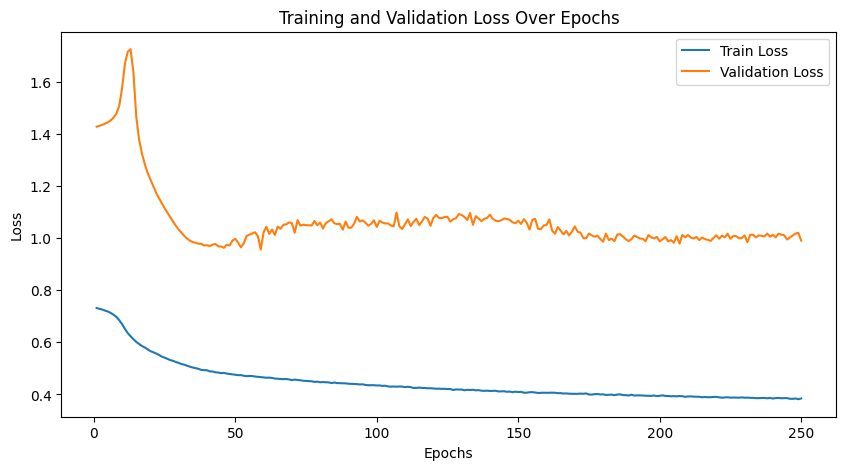

In [35]:
plot_losses(TRAIN_LOSSES, VAL_LOSSES)

In [36]:
# Specify the epoch number you want to load
epoch_number = 250  # For example, if you want to load the model from epoch 50
state_time = '20250226_182737'  # Specify your timestamp here, e.g., '20230925_153000'

# Construct the file name for the model
model_file_name = f'Seq2Seq_model_state/Seq2Seq_model_{state_time}/Seq2Seq_model_epoch_{epoch_number}.pth'

# Load the state of the Seq2Seq model
model.load_state_dict(torch.load(model_file_name))
print(f'Loaded model from {model_file_name}')

Loaded model from Seq2Seq_model_state/Seq2Seq_model_20250226_182737/Seq2Seq_model_epoch_250.pth


In [37]:
outputs=[]
inputs=[]
for input in train_loader:
  input = input.to(device)
  input = input.float()
  output = model(input)
  outputs.append(output)
  inputs.append(input)

In [38]:
# True Label (Input data)
data = inputs[8]
first_feature = data[0, :, 0]
first_feature

tensor([-0.0067,  0.0402,  0.0396, -0.0157,  0.0283, -0.0261,  0.0766, -0.0693,
         0.0155,  0.0126, -0.0173,  0.0047,  0.0083,  0.0036, -0.0010,  0.0115,
        -0.0631,  0.0197,  0.0009, -0.0140,  0.0089,  0.0105, -0.0064, -0.0084,
        -0.0081,  0.0052, -0.0069,  0.0412, -0.0063, -0.0347, -0.0051, -0.0095,
        -0.0165,  0.0115,  0.0083, -0.0059,  0.0102, -0.0159, -0.0031,  0.0085,
        -0.0073,  0.0298, -0.0093,  0.0191, -0.0218,  0.0060, -0.0059,  0.0074,
        -0.0065,  0.0014, -0.0063, -0.0070,  0.0023,  0.0017,  0.0042, -0.0052,
         0.0247,  0.0136,  0.0089, -0.0068], device='cuda:0')

In [39]:
# Seq2Seq Outputs
data = outputs[8]
first_feature = data[0, :, 0]
first_feature

tensor([-3.3608e-02, -2.3267e-02,  7.7441e-03,  3.4169e-03, -3.6164e-04,
        -1.6802e-03, -1.3507e-03, -8.8289e-07,  1.8406e-03,  3.8270e-03,
        -1.8556e-03, -4.4716e-03, -5.2372e-03, -4.0172e-03, -4.5931e-03,
         3.0193e-03, -7.7851e-05, -1.0918e-03,  2.5732e-02,  3.7928e-02,
         4.2262e-02,  6.7500e-02,  7.6217e-02,  7.2600e-02,  5.8729e-02,
         6.8862e-02,  6.1741e-02,  6.5380e-02,  6.2782e-02,  6.2299e-02,
         7.2664e-02,  6.5529e-02,  7.5076e-02,  7.1184e-02,  7.4566e-02,
         7.8230e-02,  7.9661e-02,  7.9453e-02,  8.2133e-02,  7.8290e-02,
         7.3535e-02,  7.9874e-02,  7.9548e-02,  5.8036e-02,  4.4066e-02,
         3.1612e-02,  2.3357e-02,  2.2718e-02,  2.0491e-02,  1.9449e-02,
         1.8690e-02,  1.7948e-02,  1.7178e-02,  1.6404e-02,  1.7423e-02,
         1.3888e-02,  2.5286e-02,  1.7770e-02,  1.0164e-02, -4.1160e-03],
       device='cuda:0', grad_fn=<SelectBackward0>)

In [40]:
data.shape

torch.Size([64, 60, 174])

In [ ]:
# Data Processing for training GANs

cond_datas = []
real_datas = []

# Iterate through the train_loader batches
for batch in train_loader:
    print(f"Train_data shape: {batch.shape}")  

    # Move the inputs to the appropriate device and ensure they are in float32 format
    inputs = batch.to(device)
    inputs = inputs.float()

    # Pass through the encoder model to get conditional data
    cond_data, _ = model.encoder(inputs)
    print(f"Cond_data shape: {cond_data.shape}")  

    # Detach the conditional data from the computation graph and remove extra dimensions
    cond_data = cond_data.squeeze().detach()

    # Extract the corresponding real data (e.g., Day 61-90 btc log return)
    batch_indices = range(batch.size(0))
    real_data = data_processor.get_y_for_batch(batch_indices, FUTURE_STEP)
    print(f"Real_data shape: {real_data.shape}")  

    # Append processed data to the lists
    cond_datas.append(cond_data.squeeze(0))
    real_datas.append(real_data)

# Concatenate all the conditional data and real data
cond_datas = torch.cat(cond_datas, dim=0)
real_datas = torch.cat(real_datas, dim=0)

# Create a TensorDataset from the concatenated data
GANs_dataset = torch.utils.data.TensorDataset(real_datas, cond_datas)

# Create a DataLoader for the GAN model training
GANs_data_loader = DataLoader(GANs_dataset, batch_size=BATCH_SIZE, shuffle=False)


Train_data shape: torch.Size([64, 60, 174])
Cond_data shape: torch.Size([1, 64, 32])
Real_data shape: torch.Size([64, 30])
Train_data shape: torch.Size([64, 60, 174])
Cond_data shape: torch.Size([1, 64, 32])
Real_data shape: torch.Size([64, 30])
Train_data shape: torch.Size([64, 60, 174])
Cond_data shape: torch.Size([1, 64, 32])
Real_data shape: torch.Size([64, 30])
Train_data shape: torch.Size([64, 60, 174])
Cond_data shape: torch.Size([1, 64, 32])
Real_data shape: torch.Size([64, 30])
Train_data shape: torch.Size([64, 60, 174])
Cond_data shape: torch.Size([1, 64, 32])
Real_data shape: torch.Size([64, 30])
Train_data shape: torch.Size([64, 60, 174])
Cond_data shape: torch.Size([1, 64, 32])
Real_data shape: torch.Size([64, 30])
Train_data shape: torch.Size([64, 60, 174])
Cond_data shape: torch.Size([1, 64, 32])
Real_data shape: torch.Size([64, 30])
Train_data shape: torch.Size([64, 60, 174])
Cond_data shape: torch.Size([1, 64, 32])
Real_data shape: torch.Size([64, 30])
Train_data shape

In [42]:
# Check GANs data shape
for real_data_batch, cond_data_batch in GANs_data_loader:
    # Process each batch here
    print(f"Condition data batch shape: {cond_data_batch.shape}")
    print(f"Real data batch shape: {real_data_batch.shape}")
    break # Stop after first batch

Condition data batch shape: torch.Size([64, 32])
Real data batch shape: torch.Size([64, 30])


In [43]:
class CNNGenerator(nn.Module):
    def __init__(self, input_dim, cond_dim, dnn_hidden_dim, output_dim):
        super(CNNGenerator, self).__init__()
        self.generator_cnn = nn.Sequential(
            nn.Conv1d(in_channels = 1, out_channels = 6, kernel_size = 3, stride = 1, padding = 1),
            nn.BatchNorm1d(num_features = 6),
            nn.ReLU(),
            nn.Conv1d(in_channels = 6, out_channels = 12, kernel_size = 3, stride = 1, padding = 1),
            nn.BatchNorm1d(num_features = 12),
            nn.ReLU(),
            nn.Conv1d(in_channels = 12, out_channels = 12, kernel_size = 3, stride = 1, padding = 1),
            nn.BatchNorm1d(num_features = 12),
            nn.ReLU(),
            nn.Flatten()
        )
        self.linear1 = nn.Linear(in_features = 12 * (input_dim + cond_dim), out_features = 128)
        self.linear2 = nn.Linear(in_features = 128, out_features = output_dim)

    def forward(self, noise, cond):
        """
        :Arg noise: torch.Tensor, shape [batch_size, input_dim].
        :Arg cond: torch.Tensor, shape [batch_size, cond_dim].

        :Return: torch.Tensor, shape [batch_size, output_dim].
        The generated data from the generator.
        """
        # Concatenate noise with conditional input
        x = torch.cat((noise, cond), dim=1)  # Shape: (batch_size, input_dim + cond_dim)
        x = x.unsqueeze(1)

        # Pass through the generator
        generated_data = self.generator_cnn(x)
        generated_data = nn.functional.relu(self.linear1(generated_data))
        generated_data = self.linear2(generated_data)

        # generated_data = self.generator(x)  # Shape: (batch_size, output_dim)
        return generated_data

In [44]:
# LSTM-based projection discriminator class
class ProjectionDiscriminator(nn.Module):
    def __init__(self, input_dim, hidden_dim, cond_dim):
        super(ProjectionDiscriminator, self).__init__()
        # Define LSTM layer
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        # Projection layer for conditional data
        # self.cond_projection = nn.Linear(cond_dim, hidden_dim)

        self.fc = nn.Linear(input_dim + cond_dim, hidden_dim)
        self.output_layer = nn.Linear(hidden_dim, 1)

    def forward(self, time_series, cond):
        """
        :Arg time_series: torch.Tensor, shape [batch_size, input_dim].
        :Arg cond: torch.Tensor, shape [batch_size, cond_dim].

        :Return: torch.Tensor, shape [batch_size, 1].
        The final score indicating realness and projection.
        """
        # Add sequence dimension: (batch_size, 1, input_dim)
        time_series_unsqueeze = time_series.unsqueeze(1)
        lstm_out, _ = self.lstm(time_series_unsqueeze)  # LSTM output: (batch_size, seq_length, hidden_dim)
        hidden_rep = lstm_out[:, -1, :]  # Get the last hidden state: (batch_size, hidden_dim)

        # Compute realness score based on hidden representation
        realness_score = self.output_layer(hidden_rep)  # Shape: (batch_size, 1)

        # Concatenate time_series and cond along the last dimension
        combined_input = torch.cat((time_series, cond), dim=1)  # (batch_size x (input_dim + cond_dim))

        # Pass through the fully connected layer
        out = self.fc(combined_input)  # (batch_size x hidden_dim)
        out = F.leaky_relu(out)
        projection_score = self.output_layer(out)  # (batch_size x 1)

        # Total score: realness + projection score
        final_score = realness_score + projection_score  # Shape: (batch_size, 1)

        return final_score

In [45]:
# Generator loss (Adversarial Loss)
def generator_loss(critic, fake_data, cond_data):
    """
    :Arg critic: ProjectionDiscriminator, the projection discriminator.
    :Arg fake_data: torch.Tensor, generated data from the generator.
    :Arg cond_data: torch.Tensor, conditional input.

    :Return: torch.Tensor.
    Negative mean score of the fake data, representing generator loss.
    """
    fake_score = critic(fake_data, cond_data)  # Score for generated data
    return -fake_score.mean()  # Adversarial Loss (maximize critic's score)


In [46]:
# Critic loss (Projection Discriminator)
def critic_loss(critic, real_data, fake_data, cond_data):
    """
    :Arg critic: ProjectionDiscriminator, the projection discriminator.
    :Arg real_data: torch.Tensor, real data samples.
    :Arg fake_data: torch.Tensor, generated data from the generator.
    :Arg cond_data: torch.Tensor, conditional input.

    :Return: torch.Tensor, WGAN Critic loss.
    """
    real_score = critic(real_data, cond_data)  # Score for real data
    fake_score = critic(fake_data, cond_data)  # Score for generated data
    return -(real_score.mean() - fake_score.mean())  # WGAN Critic loss


In [47]:
# Training a Conditional GAN with Projection Discriminator
def train_cgan_projection(generator, critic, gen_opt, critic_opt, data_loader, num_epochs, device, n_critic=1, clip_value=0.01):
    """
    Train the Conditional GAN with a projection discriminator.

    :Arg generator: DNNGenerator, the generator model.
    :Arg critic: ProjectionDiscriminator, the projection discriminator model.
    :Arg gen_opt: Optimizer for the generator.
    :Arg critic_opt: Optimizer for the critic.
    :Arg data_loader: DataLoader, provides the real and conditional data.
    :Arg num_epochs: int, number of training epochs.
    :Arg device: torch.device, device to run the model on (CPU or GPU).
    :Arg n_critic: int, number of critic updates per generator update.
    :Arg clip_value: float, clipping value for the critic weights.

    :Return: Tuple of lists containing average generator and critic losses per epoch.
    """
    generator_loss_list = []  # List to store generator losses
    critic_loss_list = []  # List to store critic losses

    # Get current time for saving models
    taiwan_tz = pytz.timezone('Asia/Taipei')
    current_time = datetime.now(taiwan_tz).strftime("%Y%m%d_%H%M%S")

    for epoch in range(num_epochs):
        c_loss = 0  # Initialize critic loss for this epoch
        g_loss = 0  # Initialize generator loss for this epoch

        for real_data, cond_data in data_loader:
            real_data, cond_data = real_data.to(device), cond_data.to(device)  # Move data to device

            # ---- Critic Training ---- #
            for _ in range(n_critic):
                # Generate noise and fake data
                noise = torch.randn(cond_data.size(0), cond_data.size(1)).to(device)
                fake_data = generator(noise, cond_data).detach()  # Detach for critic update

                # Calculate critic loss (real vs fake)
                loss_critic = critic_loss(critic, real_data, fake_data, cond_data)
                c_loss += loss_critic.item()  # Accumulate critic loss

                # Optimize the critic
                critic_opt.zero_grad()  # Zero gradients for the critic
                loss_critic.backward()  # Backpropagation
                critic_opt.step()  # Update critic parameters

                # Weight clipping (WGAN requirement)
                for p in critic.parameters():
                    p.data.clamp_(-clip_value, clip_value)

            # ---- Generator Training ---- #
            noise = torch.randn(cond_data.size(0), cond_data.size(1)).to(device)  # Generate new noise
            fake_data = generator(noise, cond_data)  # Generate fresh data

            # Calculate generator loss based on critic's score
            gen_score = critic(fake_data, cond_data)
            loss_gen = -gen_score.mean()  # Maximize critic's score (WGAN-GP style loss)
            g_loss += loss_gen.item()  # Accumulate generator loss

            # Optimize the generator
            gen_opt.zero_grad()  # Zero gradients for the generator
            loss_gen.backward()  # Backpropagation
            gen_opt.step()  # Update generator parameters

        # Save average losses for monitoring
        generator_loss_list.append(g_loss / len(data_loader))
        critic_loss_list.append(c_loss / (len(data_loader) * n_critic))

        # Save the model every 25 epochs after the first 100 epochs
        if (epoch + 1) >= 100 and (epoch + 1) % 25 == 0:
            # Define the base save directory
            base_save_path = 'GAN_model_state'

            # Create a new directory with the current timestamp inside the base path
            save_path = os.path.join(base_save_path, f'GAN_model_{current_time}')
            os.makedirs(save_path, exist_ok=True)  # Create the timestamped folder

            # Save each model in the timestamped folder
            torch.save(generator.state_dict(), os.path.join(save_path, f'generator_epoch_{epoch+1}.pth'))
            torch.save(critic.state_dict(), os.path.join(save_path, f'critic_epoch_{epoch+1}.pth'))

        # Optional: Visualize loss progression
        clear_output(wait=True)
        fig, ax1 = plt.subplots(figsize=(6.4, 4))

        # Plot Generator Loss on the left y-axis
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Generator Loss', color='black')
        ax1.plot(generator_loss_list, label='Generator Loss', color='tab:blue')
        ax1.tick_params(axis='y', labelcolor='black')
        ax1.spines['left'].set_color('black')

        # Plot Critic Loss on the right y-axis
        ax2 = ax1.twinx()
        ax2.set_ylabel('Critic Loss', color='black')
        ax2.plot(critic_loss_list, label='Critic Loss', color='tab:orange')
        ax2.tick_params(axis='y', labelcolor='black')
        ax2.spines['right'].set_color('black')

        # Add title and legend
        plt.title('Loss Progression of Generator and Critic')
        fig.legend(loc='upper left', bbox_to_anchor=(0.10, 0.95), bbox_transform=ax1.transAxes)

        fig.tight_layout()  # Adjust layout
        plt.show()

    return generator_loss_list, critic_loss_list


In [48]:
# Set hyperparameters
G_INPUT_DIM = 32
G_COND_DIM = 32
C_INPUT_DIM = 30
C_COND_DIM = G_COND_DIM
HIDDEN_DIM = 128
OUTPUT_DIM = 30  # Feature 30-day log return
LATENT_DIM = 32
G_lr = 5e-5
C_lr = 5e-5
GANs_NUM_EPOCHS = 2000

In [49]:
# Initialize models
generator = CNNGenerator(input_dim=G_INPUT_DIM, cond_dim=G_COND_DIM, dnn_hidden_dim=HIDDEN_DIM, output_dim=OUTPUT_DIM).to(device)
critic = ProjectionDiscriminator(C_INPUT_DIM, HIDDEN_DIM, C_COND_DIM).to(device)

# Optimizers
gen_opt = optim.RMSprop(generator.parameters(), lr=G_lr, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)
critic_opt = optim.RMSprop(critic.parameters(), lr=C_lr, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)

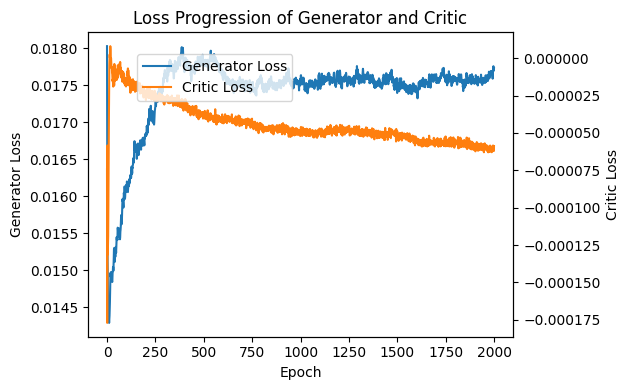

In [50]:
# Training
generator_loss_list, critic_loss_list = train_cgan_projection(generator, critic, gen_opt, critic_opt, GANs_data_loader, GANs_NUM_EPOCHS, device)

In [51]:
def find_best_epoch(generator_loss_list, start_epoch=1200, end_epoch=1300, step=25):
    """
    Find the epoch with the lowest generator loss within a given range.

    :Arg generator_loss_list: List of generator losses per epoch.
    :Arg start_epoch: int, the starting epoch to search (default: 1200).
    :Arg end_epoch: int, the ending epoch to search (default: 1300).
    :Arg step: int, the step size for the epoch (default: 25).

    :Return: Tuple of the lowest loss and the corresponding epoch.
    """
    # Calculate the indices that correspond to the given epoch range
    start_index = (start_epoch - 1) // step
    end_index = (end_epoch - 1) // step

    # Slice the loss list for the desired range
    sliced_loss_list = generator_loss_list[start_index:end_index+1]

    # Find the minimum loss and the corresponding epoch
    min_loss = min(sliced_loss_list)
    min_loss_index = sliced_loss_list.index(min_loss)

    # Convert the index back to the corresponding epoch number
    best_epoch = start_epoch + min_loss_index * step

    return min_loss, best_epoch


In [53]:
best_loss, best_epoch = find_best_epoch(generator_loss_list, start_epoch=25, end_epoch=2500)
print(f"Best generator model found at epoch {best_epoch} with loss {best_loss}")


Best generator model found at epoch 300 with loss 0.01428612121239756


In [ ]:
# Specify the epoch number you want to load
epoch_number = 300 
state_time = '20250226_184530'  

# Construct the file name for the generator model
generator_file_name = f'GAN_model_state/GAN_model_{state_time}/generator_epoch_{epoch_number}.pth'

# Load the state of the generator model
generator.load_state_dict(torch.load(generator_file_name))
print(f'Loaded generator model from {generator_file_name}')


Loaded generator model from GAN_model_state/GAN_model_20250226_184530/generator_epoch_300.pth


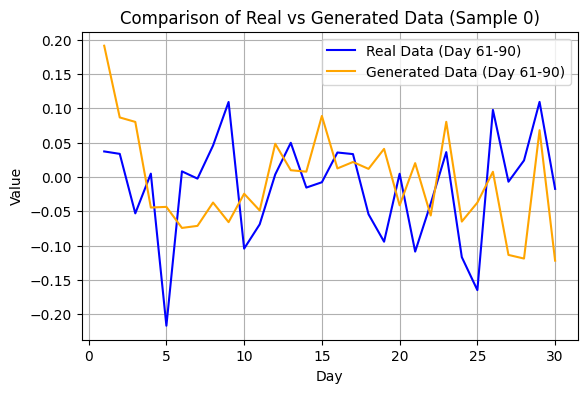

In [57]:
# Generated Data Visualization: Comparison with Real Data (30-day segmented real data)
# Function to visualize real vs generated data
def plot_real_vs_generated(real_data, generated_data, index=0):
    """
    Plot a line graph comparing real data with generated data for a selected index.

    :param real_data: torch.Tensor, shape [batch_size, future_step], real stock prices/log returns
    :param generated_data: torch.Tensor, shape [batch_size, future_step], generated stock prices/log returns
    :param index: int, the index of the data sample to visualize
    """
    # Select real and generated data for the given index
    real = real_data[index].cpu().detach().numpy()  # Real data for future steps (61-90)
    generated = generated_data[index].cpu().detach().numpy()  # Generated future predictions

    # Plot the real and generated data for future steps (61-90 days)
    plt.figure(figsize=(6.4, 4))
    plt.plot(range(1, 31), real, label="Real Data (Day 61-90)", color='blue', linestyle='-')
    plt.plot(range(1, 31), generated, label="Generated Data (Day 61-90)", color='orange', linestyle='-')
    plt.title(f"Comparison of Real vs Generated Data (Sample {index})")
    plt.xlabel("Day")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()


# Select a batch of real and conditional data from the GANs_data_loader
for real_batch, cond_batch in GANs_data_loader:
    real_batch = real_batch.to(device)  # Real data (61-90 days, 30-day segments)
    cond_batch = cond_batch.to(device)  # Conditional data (1-60 days)

    # Generate future predictions for 61-90 days using the loaded generator model
    noise = torch.randn(cond_batch.size(0), cond_batch.size(1)).to(device)
    generated_batch = generator(noise, cond_batch)  # Shape [batch_size, 30], predicting days 61-90

    # Plot comparison for the first sample (index 0)
    plot_real_vs_generated(real_batch, generated_batch, index=0)

    # You can add more comparisons if needed, e.g., for multiple indices
    break  # Only process one batch for visualization

In [ ]:
train_loader

In [ ]:
from tqdm import tqdm
########################################################
## 3. Generate Predictions
########################################################

# 取特定日期範圍(範例)
START_DATE = '2022-08-01'
END_DATE = '2024-08-30'

NUMS = 10000  # 要產生多少次模擬數據

model.eval()
generator.eval()

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
folder_path = f"simulated_data_{timestamp}/"
os.makedirs(folder_path, exist_ok=True)

dates = pd.date_range(start=START_DATE, end=END_DATE)
all_dates = dates[:len(val_loader)]  

for i, (x, date) in tqdm(enumerate(zip(val_loader, all_dates)), total=len(val_loader)):
    inputs = x.to(device).float()
    

    cond, _ = model.encoder(inputs)
    cond = cond.squeeze(0)
    
    simulated_data = []
    for _ in range(NUMS):
        noise = torch.randn(cond.size(0), cond.size(1)).to(device)
        generated_returns = generator(noise, cond)
        generated_returns = generated_returns.sum(dim=1).detach().cpu().numpy()[0]
        simulated_data.append(generated_returns)
    
    log_returns_df = pd.DataFrame(simulated_data)
    csv_filename = f"{folder_path}simulated_log_returns_batch_{i+1}.csv"
    log_returns_df.to_csv(csv_filename, index=False)
    print(f"Batch {i+1} data saved to {csv_filename}")

print("Data generation complete!")




 11%|█         | 1/9 [00:10<01:25, 10.64s/it]

Batch 1 data saved to simulated_data_20250226_204936/simulated_log_returns_batch_1.csv


 22%|██▏       | 2/9 [00:21<01:15, 10.76s/it]

Batch 2 data saved to simulated_data_20250226_204936/simulated_log_returns_batch_2.csv


 33%|███▎      | 3/9 [00:32<01:04, 10.75s/it]

Batch 3 data saved to simulated_data_20250226_204936/simulated_log_returns_batch_3.csv


 44%|████▍     | 4/9 [00:42<00:52, 10.50s/it]

Batch 4 data saved to simulated_data_20250226_204936/simulated_log_returns_batch_4.csv


 56%|█████▌    | 5/9 [00:53<00:42, 10.60s/it]

Batch 5 data saved to simulated_data_20250226_204936/simulated_log_returns_batch_5.csv


 67%|██████▋   | 6/9 [01:03<00:31, 10.49s/it]

Batch 6 data saved to simulated_data_20250226_204936/simulated_log_returns_batch_6.csv


 78%|███████▊  | 7/9 [01:13<00:20, 10.45s/it]

Batch 7 data saved to simulated_data_20250226_204936/simulated_log_returns_batch_7.csv


 89%|████████▉ | 8/9 [01:24<00:10, 10.51s/it]

Batch 8 data saved to simulated_data_20250226_204936/simulated_log_returns_batch_8.csv


100%|██████████| 9/9 [01:34<00:00, 10.52s/it]

Batch 9 data saved to simulated_data_20250226_204936/simulated_log_returns_batch_9.csv
Data generation complete!


In [126]:
# ---- Combine Files ---- #

# Folder path where the CSV files are stored
folder_path = f"simulated_data_20250226_204936/"

# Initialize an empty DataFrame to summarize, with columns 0-9999
combined_df = pd.DataFrame(columns=range(NUMS))

# Read CSV files from the folder
for i, csv_file in enumerate(sorted(os.listdir(folder_path))):

    if csv_file.endswith(".csv"):
        # Read the CSV file, setting header to None
        batch_df = pd.read_csv(os.path.join(folder_path, csv_file), header=None)

        # Check if the number of rows is 10001
        if batch_df.shape[0] == NUMS+1:
            # Remove the first row, which is all zeros
            data = batch_df.iloc[1:].values.flatten()  # Remove the first row

            # Check if the length of the data matches NUMS
            if len(data) == NUMS:
                # Add the corresponding date as the index of the DataFrame for this batch
                date = all_dates[i]
                combined_df.loc[date] = data
            else:
                print(f"Warning: {csv_file} has {len(data)} elements after removing the first row, expected {NUMS} elements.")
        else:
            print(f"Warning: {csv_file} has {batch_df.shape[0]} rows, expected 10001 rows.")

# Save the final combined results as a CSV file
combined_csv_filename = f"./simulated_log_returns_combined_with_dates.csv"
combined_df.to_csv(combined_csv_filename, index=True)
print(f"Combined data with dates saved to {combined_csv_filename}")


Combined data with dates saved to ./simulated_log_returns_combined_with_dates.csv


In [ ]:
# Read the real price data
CSV_FILE = 'gan訓練資料.csv'  # Replace with your CSV file path
df_csv = ohlcv
df_csv = df_csv.reset_index(names='key_0')

# Convert the date column to datetime format
df_csv['key_0'] = pd.to_datetime(df_csv['key_0'], errors='coerce')  # Ensure correct date format

# Select a specific date range
filtered_df = df_csv[df_csv['key_0'].between('2022-08-01', '2024-08-30')].copy()

# Remove weekends (Saturday and Sunday)
filtered_df = filtered_df[~filtered_df['key_0'].dt.dayofweek.isin([5, 6])]

# Select the two columns you need: date and price
real_btc = filtered_df[['key_0', df_csv.columns[4]]]  

# Display the results
print(real_btc)


                         key_0     close
1810 2022-08-01 00:00:00+00:00  23268.01
1811 2022-08-02 00:00:00+00:00  22987.79
1812 2022-08-03 00:00:00+00:00  22818.37
1813 2022-08-04 00:00:00+00:00  22622.98
1814 2022-08-05 00:00:00+00:00  23312.42
...                        ...       ...
2566 2024-08-26 00:00:00+00:00  62834.00
2567 2024-08-27 00:00:00+00:00  59415.00
2568 2024-08-28 00:00:00+00:00  59034.90
2569 2024-08-29 00:00:00+00:00  59359.01
2570 2024-08-30 00:00:00+00:00  59123.99

[545 rows x 2 columns]


In [ ]:
real_btc['key_0'] = real_btc['key_0'].dt.tz_localize(None)
real_btc['key_0']

/tmp/ipykernel_81451/3142374787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_nvda['key_0'] = real_nvda['key_0'].dt.tz_localize(None)


1810   2022-08-01
1811   2022-08-02
1812   2022-08-03
1813   2022-08-04
1814   2022-08-05
          ...    
2566   2024-08-26
2567   2024-08-27
2568   2024-08-28
2569   2024-08-29
2570   2024-08-30
Name: key_0, Length: 545, dtype: datetime64[ns]

In [129]:
df.index

RangeIndex(start=0, stop=9, step=1)

In [ ]:
# ---- Convert Predicted Log Returns to Future Prices (Predictions Combined into a List) ----#

# Assume combined_df and real_btc have already been defined
df = combined_df  

# Create an empty list to store results
price_predictions_list = []

# Create a set to store existing dates
existing_dates = set()

# Iterate over each date to perform calculations
for index, row in df.iterrows():
    # Get the current date
    current_date = index  # The first column is the date

    # Check if the current date is within the range of real_btc dates
    if current_date not in real_btc['key_0'].values:
        print(f"Skipping date: {current_date} as it is not in the range of real_nvda")
        continue  # If not in the range, skip this iteration

    # Get the actual price
    current_price = real_btc.loc[real_btc['key_0'] == current_date, 'close'].values[0]
    print(f"Current price: {current_price}, Date: {current_date}")

    # Get log returns data (from the second column onwards, retrieve all log returns)
    log_returns = row[:].to_numpy()  # Convert to NumPy array

    # Calculate future prices
    future_prices = current_price * np.exp(log_returns)  # Calculate prices using log returns

    # Calculate the future date (30 days later)
    future_date = current_date + pd.DateOffset(days=30)

    # Get the range of business days for the next 30 days
    workdays = pd.bdate_range(start=current_date, periods=30)

    # Check if future_date is a business day, and adjust to the next business day if not
    if future_date not in workdays:
        # If it's not a business day, find the next business day
        future_date = workdays[workdays > future_date][0]

    # Ensure future date is not duplicated
    while future_date in existing_dates:
        future_date += pd.DateOffset(days=1)  # Adjust to the next day
        if future_date not in workdays:  # If not a business day, keep adjusting
            future_date = workdays[workdays > future_date][0]

    # Try to get the actual price for the future date
    if future_date in real_btc['key_0'].values:
        actual_price = real_btc.loc[real_btc['key_0'] == future_date, 'close'].values[0]
    else:
        print(f"No price data found for {future_date}.")
        actual_price = None  # Or set to another appropriate default value

    # Add the current future date to the existing dates set
    existing_dates.add(future_date)

    # Append results to the list
    price_predictions_list.append({
        'DATE': future_date,
        'actual_price': actual_price,
        'predicted_price': future_prices  # Prices calculated using all log returns
    })

# Convert the list to a DataFrame
price_predictions = pd.DataFrame(price_predictions_list)

# Remove rows with NaN values
price_predictions = price_predictions.dropna()

# Display the results
print(price_predictions)

# If the DataFrame is still empty, display some debug information
if price_predictions.empty:
    print("The price predictions DataFrame is empty.")
    print("Existing dates:", existing_dates)


Current price: 23268.01, Date: 2022-08-01 00:00:00
Current price: 22987.79, Date: 2022-08-02 00:00:00
Current price: 22818.37, Date: 2022-08-03 00:00:00
Current price: 22622.98, Date: 2022-08-04 00:00:00
Current price: 23312.42, Date: 2022-08-05 00:00:00
Skipping date: 2022-08-06 00:00:00 as it is not in the range of real_nvda
Skipping date: 2022-08-07 00:00:00 as it is not in the range of real_nvda
Current price: 23810.0, Date: 2022-08-08 00:00:00
Current price: 23149.95, Date: 2022-08-09 00:00:00
        DATE  actual_price                                    predicted_price
0 2022-08-31      20050.02  [19304.849153385392, 14025.761079062378, 20310...
1 2022-09-01      20131.46  [18300.874130540673, 12426.049129534942, 16502...
2 2022-09-02      19951.86  [9683.345134240186, 16188.357860703287, 14471....
3 2022-09-05      19796.84  [20441.860788926904, 14722.80355156939, 15773....
4 2022-09-06      18790.61  [26636.10711727245, 18031.19630399807, 17786.7...
5 2022-09-07      19292.84  

In [113]:
# ---- Expand Predicted Prices ----#

# Convert each list in the 'predicted_price' column into multiple columns
predicted_prices_df = price_predictions.copy()['predicted_price'].apply(pd.Series)

# Rename the new columns, using 'predicted_price_0', 'predicted_price_1', ..., 'predicted_price_9999'
predicted_prices_df.columns = [f'predicted_price_{i}' for i in range(predicted_prices_df.shape[1])]

# Merge the new predicted prices DataFrame with the original DataFrame
price_predictions_expanded = pd.concat([price_predictions.copy().drop(columns=['predicted_price']), predicted_prices_df], axis=1)

# Display the result
print(price_predictions_expanded)

# Specify the path to save the file
csv_file_path = './expanded_price_predictions.csv'

# Save the results to a CSV file
price_predictions_expanded.to_csv(csv_file_path, index=False)

print(f"Data saved to {csv_file_path}")


        DATE  actual_price  predicted_price_0  predicted_price_1  \
0 2022-08-31      20050.02       12129.807533       15231.233511   
1 2022-09-01      20131.46       22154.031111       22758.589883   
2 2022-09-02      19951.86       12214.684962       18184.389992   
3 2022-09-05      19796.84       16505.920650       22425.276432   
4 2022-09-06      18790.61       20310.482169       20403.778734   
5 2022-09-07      19292.84       16256.453372       15424.905764   
6 2022-09-08      19319.77       19104.978026       15198.976966   
7 2022-09-09      21360.11       17690.107975       15785.972226   
8 2022-09-12      22395.74       20490.604353       19464.845561   

   predicted_price_2  predicted_price_3  predicted_price_4  predicted_price_5  \
0       19376.157896       23659.716301       16146.234358       18106.192301   
1       27728.854935       15466.033394       20182.637304       16823.486321   
2       14815.270558       15958.666140       16695.879180       19255.17649

In [114]:
# ---- Read Forecasted Price Data ----#

# Read the data into a DataFrame
price_predictions_expanded = pd.read_csv('./expanded_price_predictions.csv', header=0, index_col=0)  # index_col=0 makes the first column as the index

# Display the first few rows of the DataFrame
print(price_predictions_expanded.head())

# Confirm the type of the index
print(price_predictions_expanded.index)


            actual_price  predicted_price_0  predicted_price_1  \
DATE                                                             
2022-08-31      20050.02       12129.807533       15231.233511   
2022-09-01      20131.46       22154.031111       22758.589883   
2022-09-02      19951.86       12214.684962       18184.389992   
2022-09-05      19796.84       16505.920650       22425.276432   
2022-09-06      18790.61       20310.482169       20403.778734   

            predicted_price_2  predicted_price_3  predicted_price_4  \
DATE                                                                  
2022-08-31       19376.157896       23659.716301       16146.234358   
2022-09-01       27728.854935       15466.033394       20182.637304   
2022-09-02       14815.270558       15958.666140       16695.879180   
2022-09-05       18388.528587       15659.674483       13881.715518   
2022-09-06       25316.997188       24362.076557       17790.610102   

            predicted_price_5  predicte

In [ ]:
# ---- Find Maximum and Minimum Prices ----#

df = price_predictions.copy()

# Function to filter prices by removing the top and bottom 10%
def filter_prices(prices):
    sorted_prices = sorted(prices)
    n = len(sorted_prices)
    lower_bound_index = int(n * 0.1)  # 10% lower bound index
    upper_bound_index = int(n * 0.9)  # 90% upper bound index
    filtered_prices = sorted_prices[lower_bound_index:upper_bound_index]  # Remove top and bottom 10%
    return max(filtered_prices), min(filtered_prices)  # Return max and min

# Extract maximum and minimum prices
df['max_predicted_price'], df['min_predicted_price'] = zip(*df['predicted_price'].apply(filter_prices))

# Keep the first two columns and the new columns
bands_df = df[['DATE', 'actual_price', 'min_predicted_price', 'max_predicted_price']]

# Display the result
print(bands_df)

# Specify the path to save the file
csv_file_path = './bands_price.csv'

# Save the result as a CSV file
bands_df.to_csv(csv_file_path, index=False)

print(f"Data saved to {csv_file_path}")


        DATE  actual_price  min_predicted_price  max_predicted_price
0 2022-08-31      20050.02         14176.818007         23612.604674
1 2022-09-01      20131.46         14634.235857         24341.952629
2 2022-09-02      19951.86         13200.350910         22786.232522
3 2022-09-05      19796.84         12437.812948         22091.358497
4 2022-09-06      18790.61         15633.270471         25059.031357
5 2022-09-07      19292.84         16221.055661         25913.770592
6 2022-09-08      19319.77         13057.656552         22361.289078
7 2022-09-09      21360.11         16239.646737         26251.899593
8 2022-09-12      22395.74         14570.682571         23881.879585
Data saved to ./bands_price.csv


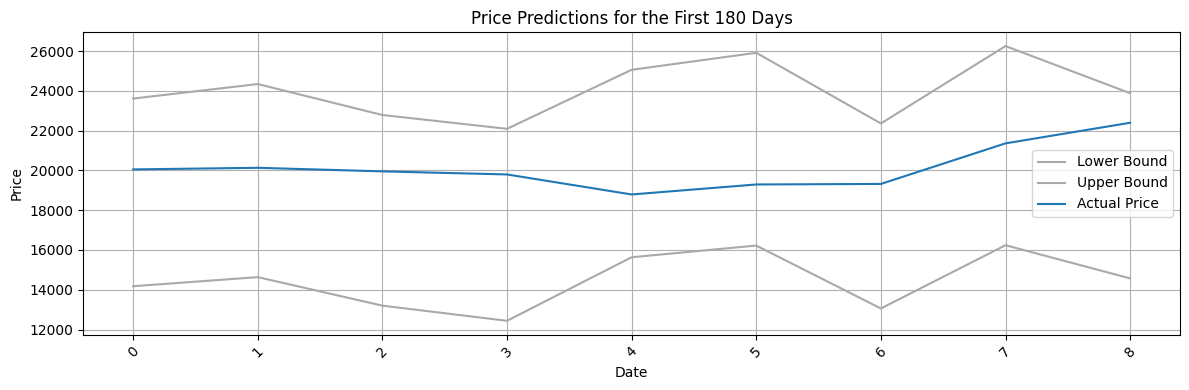

In [ ]:
# ---- Plot: Actual Prices & Predicted Price Bounds ----#
NDAYS = 8  # Number of days to plot

plt.style.use('default')  # Use the default plot style

# Select only the first N days of data
price_predictions_60_days = bands_df.head(NDAYS)

# Create the plot
plt.figure(figsize=(12, 4))
plt.plot(price_predictions_60_days.index, price_predictions_60_days['min_predicted_price'],
         label='Lower Bound', color='darkgray')  # Plot lower bound
plt.plot(price_predictions_60_days.index, price_predictions_60_days['max_predicted_price'],
         label='Upper Bound', color='darkgray')  # Plot upper bound
plt.plot(price_predictions_60_days.index, price_predictions_60_days['actual_price'],
         label='Actual Price')  # Plot actual price

# Add title and labels
plt.title(f'Price Predictions for the First {NDAYS} Days')
plt.xlabel('Date')
plt.ylabel('Price')

# Set the date format for the x-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Display legend
plt.grid()  # Show grid

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()  # Display the figure
